![ieseg logo](./img/ieseg.png)

#### MBD 2021-2022
# Statistical & Machine Learning Approaches for Marketing

## Section 6: Unsupervised Learning-Assignment

### 1. Import all required libraries and datasets

In [1]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(mlr)         # ML toolkit
library(ggplot2)     # Visualization

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)
#par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.



## Question - 3

## A

In [3]:
crime <- USArrests
str(crime)

'data.frame':	50 obs. of  4 variables:
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


In [4]:
# Show the data
head(crime)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [5]:
# Run PCA with variables scaled to sd = 1
pca_out <- prcomp(crime, center=T, scale=T)

In [6]:
# Variance explained by each principal component
pca_var <- pca_out$sdev ^ 2
pca_var

[1] 2.4802416 0.9897652 0.3565632 0.1734301

In [7]:
# Proportion of variance explained (PVE) by each principal component
pve <- pca_var / sum(pca_var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

## B

In [15]:
# The rotation matrix, principal component loading vectors
rot <- pca_out$rotation

In [16]:
crime2 <- scale(crime)

In [17]:
crime_var <- sum(apply(as.matrix(crime2)^2, 2, sum))

In [18]:
apply((as.matrix(crime2) %*% rot)^2, 2, sum) / crime_var

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752

## Question-4

## Hierarchial Clustering

In [19]:
crime <- USArrests
str(crime)

'data.frame':	50 obs. of  4 variables:
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


In [20]:
head(crime)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [33]:
dist <- dist(crime)

In [34]:
# Implement hierarchical clustering
hc_complete <- hclust(dist, method='complete')  # Complete linkage
hc_average <- hclust(dist, method='average')  # Average linkage
hc_single <- hclust(dist, method='single')  # Single linkage

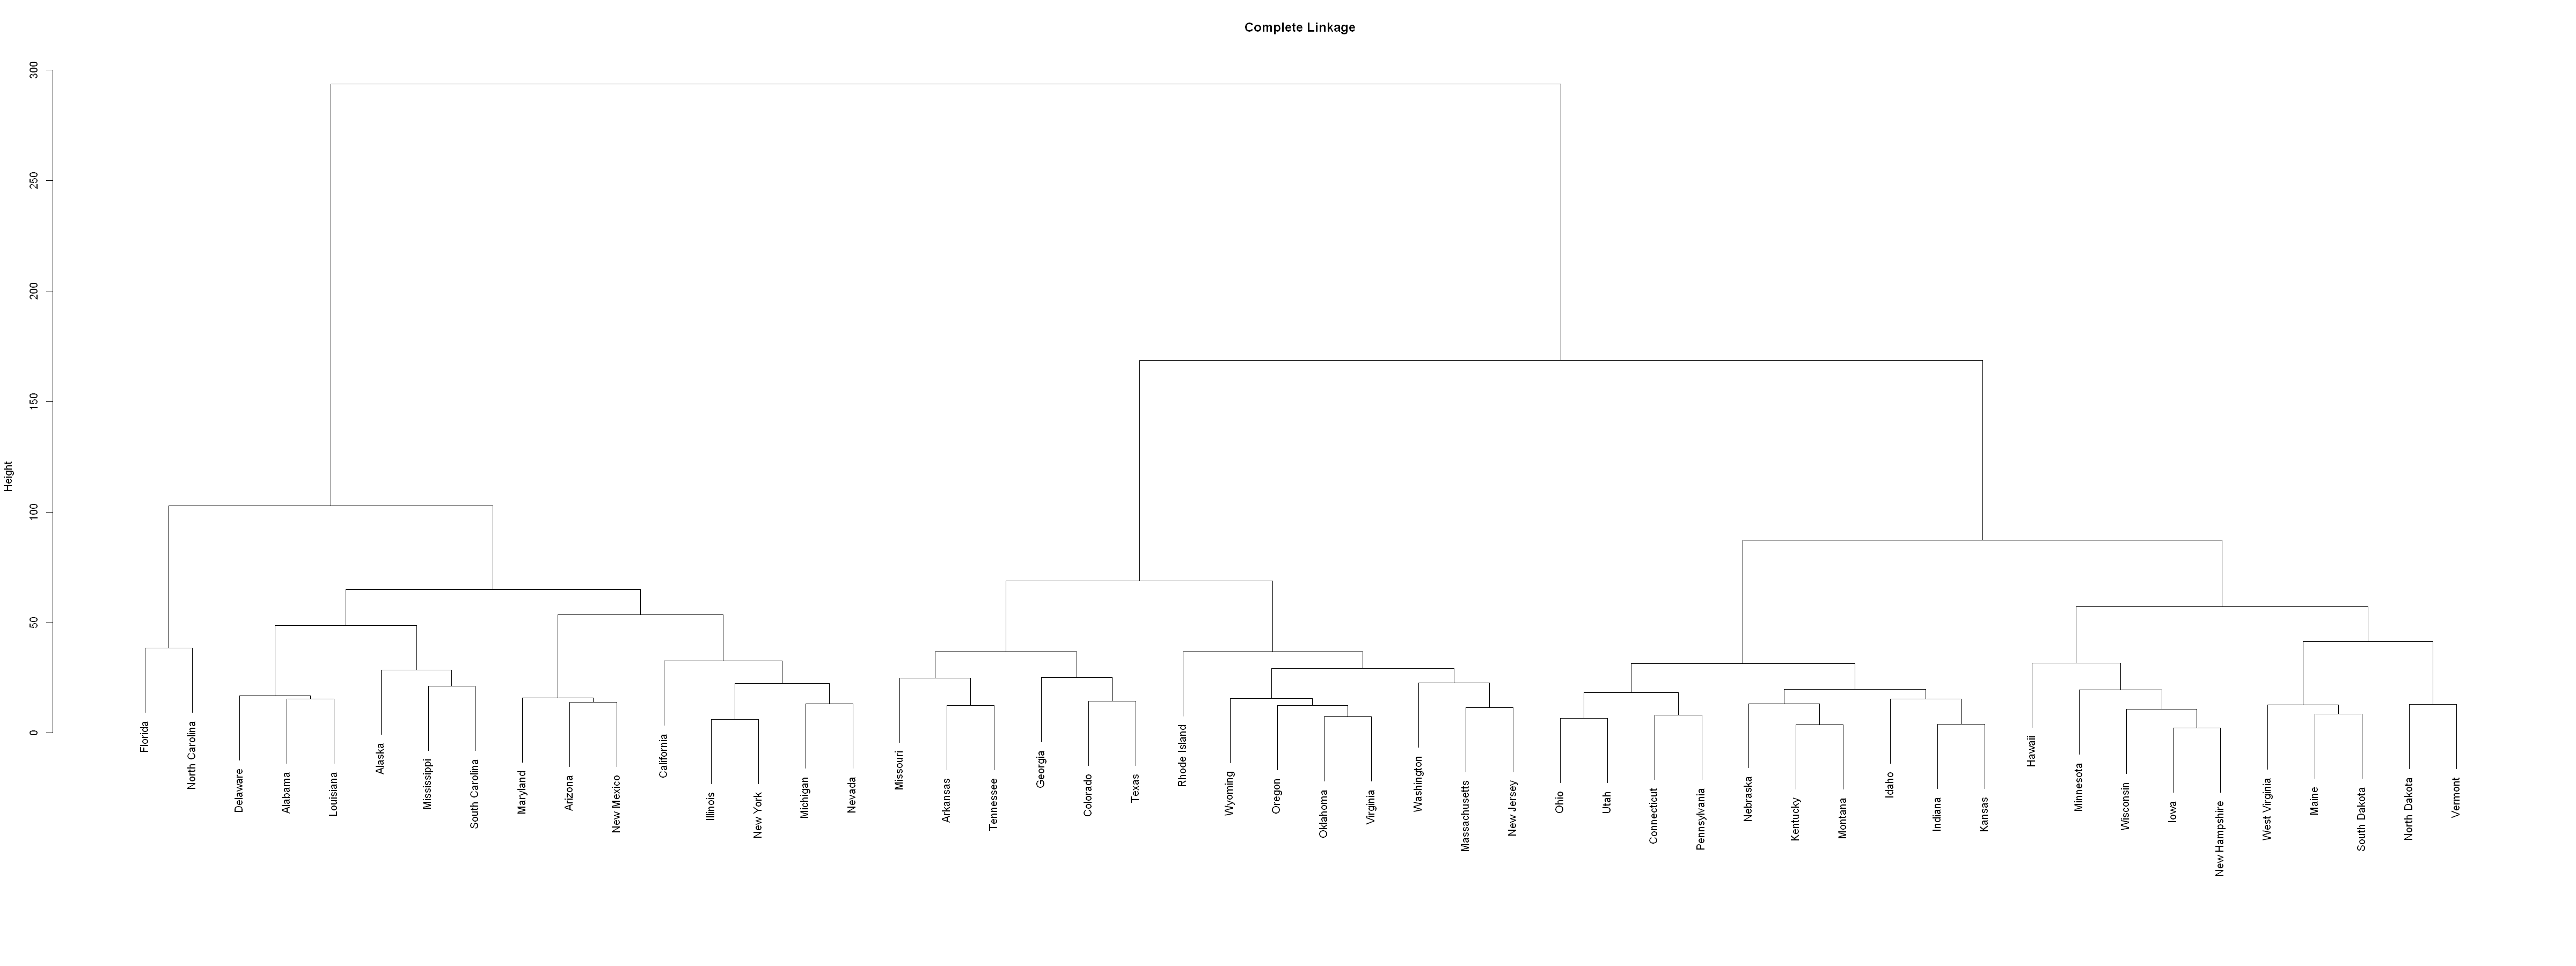

In [35]:
# Plot the dendrogram
plot(hc_complete, main='Complete Linkage', xlab='', sub='', cex=1)


## b.Cut the dendrogram at a height that results in three distinct clusters


In [28]:
cutree(hc_complete, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

## c.Hierarchically cluster the states using complete linkage and Eu- clidean distance, after scaling the variables to have standard deviation one.


In [29]:
#standard dev
sd_crime <- scale(crime)

In [31]:
#hierarchial clustering
sd_hc_complete <- hclust(dist(sd_crime), method = "complete") # Complete linkage

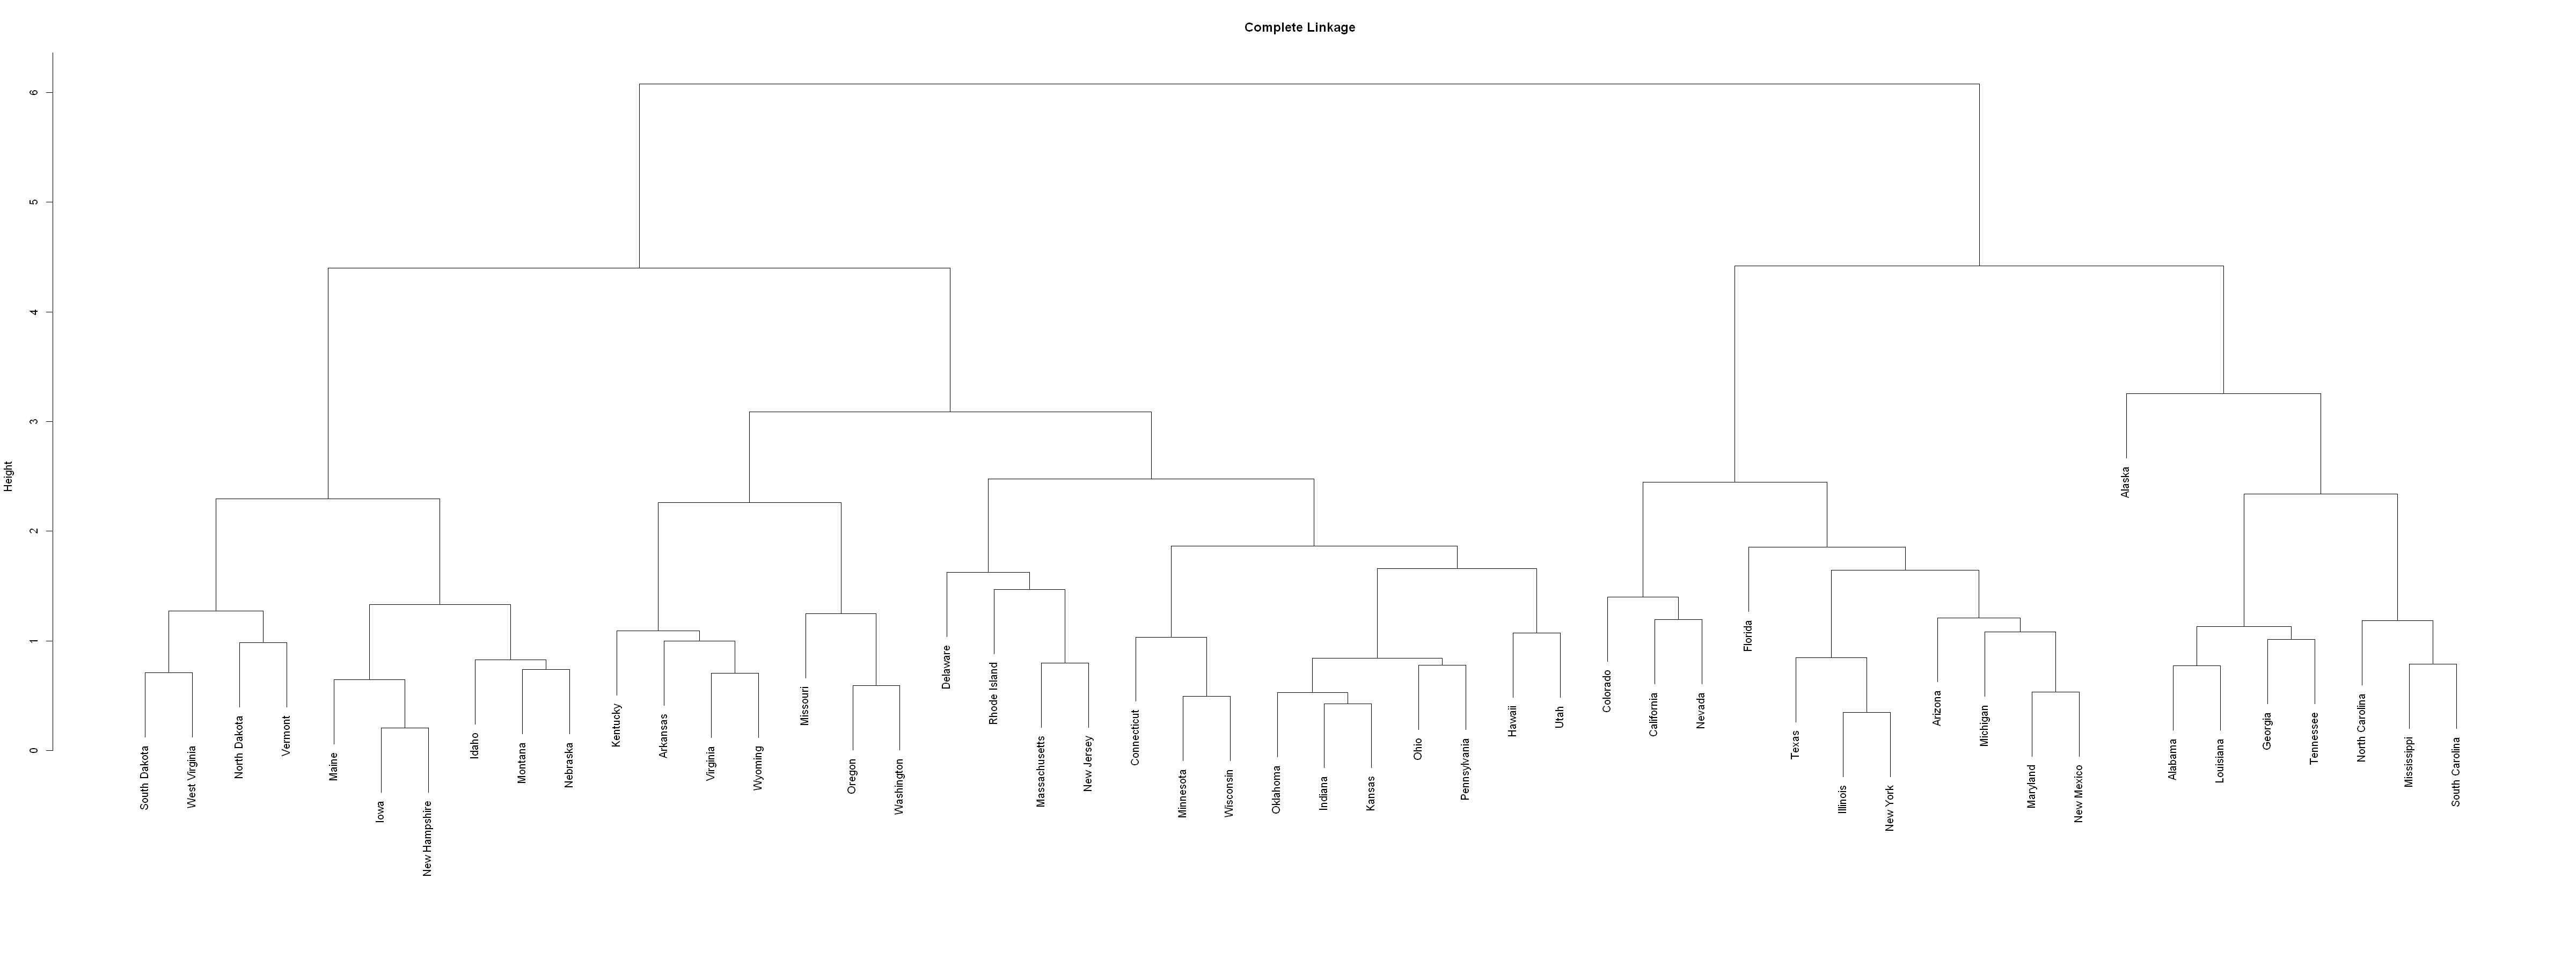

In [36]:
#plot the dendogram
plot(sd_hc_complete, main='Complete Linkage', xlab='', sub='', cex=1)

## d.)Does scaling the variables have on the hierarchical clustering obtained

In [37]:
#cut the dendogram
cutree(sd_hc_complete, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [38]:
#comparison
table(cutree(hc_complete, 3), cutree(sd_hc_complete, 3))

   
     1  2  3
  1  6  9  1
  2  2  2 10
  3  0  0 20

<b> From the table we can see that scaling the variables affect the clusters obtained. Since, the data measures have different units,The variables should be scaled beforehand

## Question-10

<b>a.Generate a simulated data set with 20 observations in each of three classe

In [40]:
# Create sample data 60obs(20 in each) and 50 variables
set.seed(2)
X <- rbind(matrix(rnorm(20*50, mean = 0), nrow = 20),
matrix(rnorm(20*50, mean=0.5), nrow = 20),
matrix(rnorm(20*50, mean=1), nrow = 20))


In [41]:
#true class
true_class = c(rep(1,20), rep(2,20), rep(3,20))

In [42]:
# Run PCA with variables scaled to sd = 1
pca_out <- prcomp(X)


In [45]:
pca <- pca_out$x

In [46]:
# Mean and sd of variables (used to scale)
print(pca_out$center)  # Mean of the original variables
print(pca_out$scale) 


 [1] 0.6136897 0.7848425 0.2533794 0.6120350 0.4306998 0.6531495 0.7436656
 [8] 0.3718346 0.5027482 0.5126478 0.5097232 0.5895119 0.3133456 0.7267606
[15] 0.8212965 0.5839617 0.7666631 0.4647987 0.6023259 0.4779454 0.5939540
[22] 0.6640079 0.4537051 0.4243165 0.4605692 0.6560024 0.9371158 0.6320955
[29] 0.7150944 0.3720932 0.4533355 0.4681338 0.4894250 0.6636035 0.3933681
[36] 0.6632761 0.5973158 0.2622648 0.5578043 0.4932231 0.4776150 0.6017268
[43] 0.7595648 0.5531856 0.6158397 0.5284796 0.4990185 0.4115671 0.2447208
[50] 0.5093892
[1] FALSE


<b>c.K-means.K = 3

In [48]:
# Perform K-Means clustering with K=3
km_out <- kmeans(X, 3)
km_out

K-means clustering with 3 clusters of sizes 24, 11, 25

Cluster means:
       [,1]      [,2]       [,3]         [,4]       [,5]      [,6]       [,7]
1 0.9685514 0.9843458 0.01303060  1.043473653  0.5926499 0.7407722 1.12869196
2 0.6123875 1.6859297 1.29745814  1.066035323  1.5999515 1.0578253 1.37555163
3 0.2735954 0.1968409 0.02471972 -0.001906148 -0.2392431 0.3909744 0.09601047
         [,8]      [,9]      [,10]     [,11]     [,12]       [,13]      [,14]
1  0.75305943 0.6985295  0.9915461 0.6893035 0.8812409 -0.09782993 1.12560720
2  0.50488674 0.9900709  1.2575185 0.8068305 0.9769073  1.04842284 1.45058698
3 -0.05268411 0.1003762 -0.2748376 0.2065989 0.1389982  0.38464007 0.02538428
      [,15]     [,16]     [,17]     [,18]      [,19]     [,20]      [,21]
1 1.0719937 0.6316780 0.6094257 0.6986792 0.92338065 0.4837252  1.2339822
2 1.4276078 1.6481509 1.3693164 0.3259864 1.06112212 0.6630642  1.0711862
3 0.3138503 0.0699109 0.6524434 0.3013509 0.09224295 0.3909445 -0.2304551
      [,2

In [49]:
#table
table(km_out$cluster, true_class)


   true_class
     1  2  3
  1  0 15  9
  2  0  0 11
  3 20  5  0

<b>d.K-means.K = 2

In [50]:
# Perform K-Means clustering with K=2
km_out <- kmeans(X, 2)
km_out

K-means clustering with 2 clusters of sizes 30, 30

Cluster means:
       [,1]      [,2]       [,3]     [,4]       [,5]      [,6]      [,7]
1 0.8981188 1.3418566 0.47167655 1.088663  1.0258277 0.9054867 1.3795745
2 0.3292606 0.2278283 0.03508234 0.135407 -0.1644282 0.4008123 0.1077567
       [,8]      [,9]      [,10]     [,11]     [,12]     [,13]     [,14]
1 0.5803191 0.8643453  1.1113608 0.7434994 1.0685584 0.3426116 1.2420028
2 0.1633501 0.1411510 -0.0860651 0.2759471 0.1104655 0.2840796 0.2115184
      [,15]     [,16]     [,17]     [,18]     [,19]     [,20]      [,21]
1 1.0590326 1.0488398 0.8855262 0.5604914 0.9422885 0.5721842  1.3145805
2 0.5835604 0.1190836 0.6477999 0.3691060 0.2623633 0.3837066 -0.1266724
      [,22]      [,23]      [,24]        [,25]     [,26]     [,27]     [,28]
1 1.1330176 0.83831027 0.78964212  0.924528083 1.1309473 1.3320579 1.0170591
2 0.1949982 0.06909987 0.05899092 -0.003389686 0.1810575 0.5421738 0.2471319
      [,29]        [,30]     [,31]        [,3

In [51]:
#table
table(km_out$cluster, true_class)

   true_class
     1  2  3
  1  0 10 20
  2 20 10  0

<b>e.K-means.K = 4

In [52]:
# Perform K-Means clustering with K=4
km_out <- kmeans(X, 4)
km_out

K-means clustering with 4 clusters of sizes 13, 21, 16, 10

Cluster means:
       [,1]       [,2]        [,3]        [,4]       [,5]      [,6]      [,7]
1 0.9114382 0.72759454  0.05504670  1.26073762  0.4795170 0.9037463 1.2938308
2 0.2364949 0.08690357  0.08980423 -0.09027986 -0.3055880 0.4220260 0.1574016
3 0.9653693 1.19242838 -0.07412722  0.76395019  0.5824176 0.5116641 0.6541300
4 0.4560383 1.67279897  1.37873065  1.00051875  1.6706931 1.0391097 1.4028623
        [,8]       [,9]      [,10]     [,11]      [,12]      [,13]      [,14]
1  1.0093750  0.8132752  1.2567733 1.0332084 1.47317329 -0.1269728  1.0270260
2 -0.1043370 -0.1072042 -0.2638531 0.1491331 0.07752544  0.2624885 -0.1202397
3  0.3775483  0.7815820  0.4349129 0.2966694 0.31692871  0.3047855  1.1907171
4  0.5338508  0.9338291  1.3003127 0.9273180 0.95205699  1.0062554  1.3727859
      [,15]      [,16]     [,17]       [,18]     [,19]     [,20]      [,21]
1 1.1217636 0.53196231 0.8160072  1.09969582 0.8821165 0.4010335  1.2

In [53]:
#table
table(km_out$cluster, true_class)

   true_class
     1  2  3
  1  0  5  8
  2 20  1  0
  3  0 14  2
  4  0  0 10

<b>f.solution

In [54]:
# Perform K-Means clustering with K=3
km_out <- kmeans(pca[,1:2], 3)
km_out

K-means clustering with 3 clusters of sizes 20, 18, 22

Cluster means:
         PC1         PC2
1  0.3828166 -0.30181748
2  3.9391897  0.28926237
3 -3.5709885  0.03771032

Clustering vector:
 [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1
[39] 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2

Within cluster sum of squares by cluster:
[1]  56.28712  88.75801 109.62995
 (between_SS / total_SS =  69.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [55]:
#table
table(km_out$cluster, true_class)

   true_class
     1  2  3
  1  0 18  2
  2  0  0 18
  3 20  2  0

<b>g.Solution

In [56]:
# Perform K-Means clustering with K=3
km_out <- kmeans(scale(X), 3)
km_out

K-means clustering with 3 clusters of sizes 17, 21, 22

Cluster means:
        [,1]       [,2]       [,3]       [,4]       [,5]       [,6]       [,7]
1  0.2271316  0.5885271  0.6022732  0.5095350  0.6265745  0.5798577  0.4612735
2  0.1830229  0.1080940 -0.3203822  0.2298665  0.1134500 -0.2162637  0.1316427
3 -0.3502144 -0.5579516 -0.1595735 -0.6131497 -0.5924644 -0.2416383 -0.4820976
        [,8]       [,9]       [,10]       [,11]       [,12]       [,13]
1  0.3751310  0.5224074  0.80918737  0.48662255  0.55074511  0.12718948
2  0.1782427  0.1418643  0.06408854  0.00316903  0.03278755 -0.03374003
3 -0.4600147 -0.5390944 -0.68645657 -0.37905150 -0.45687297 -0.06607639
       [,14]       [,15]      [,16]      [,17]       [,18]      [,19]
1  0.5980460  0.46550965  0.6984916  0.5761217  0.22620710  0.4616036
2  0.2581182  0.08398052 -0.1162374 -0.3169360 -0.15667527  0.1097966
3 -0.7085120 -0.43987523 -0.4287897 -0.1426551 -0.02524273 -0.4614995
        [,20]      [,21]       [,22]       [,

In [57]:
#table
table(km_out$cluster, true_class)

   true_class
     1  2  3
  1  0  0 17
  2  0 18  3
  3 20  2  0